# Support Vector Machine
A support vector machine (SVM) is a computer algorithm that learns by example to assign labels to objects1

In [7]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()


In [8]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We have another variable in iris. So append the target variable in the df

In [15]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df.shape

(150, 5)

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

0 = setosa
1 = versicolor
2 = virginica

In [19]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [24]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


From 50 we have versicolor

In [25]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


From 100 we have virginica

In [27]:
df['target_flower'] = df.target.apply(lambda x: iris.target_names[x] )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
%matplotlib inline

In [30]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [32]:
df0.head(),df1.head(),df1.head()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                5.1               3.5                1.4               0.2   
 1                4.9               3.0                1.4               0.2   
 2                4.7               3.2                1.3               0.2   
 3                4.6               3.1                1.5               0.2   
 4                5.0               3.6                1.4               0.2   
 
    target target_flower  
 0       0        setosa  
 1       0        setosa  
 2       0        setosa  
 3       0        setosa  
 4       0        setosa  ,
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 50                7.0               3.2                4.7               1.4   
 51                6.4               3.2                4.5               1.5   
 52                6.9               3.1                4.9               1.5   
 53                5.5         

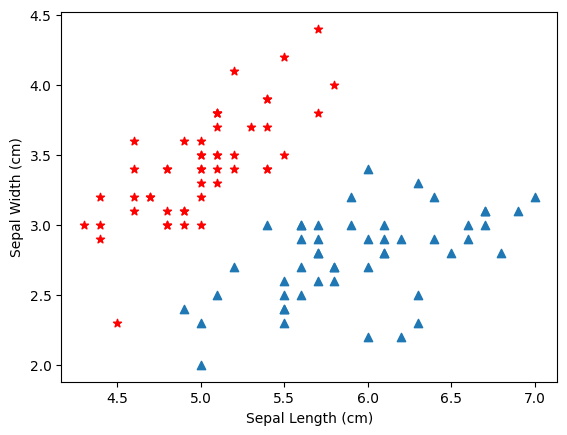

In [38]:
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'red',marker='*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='^')
# plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color = 'green')

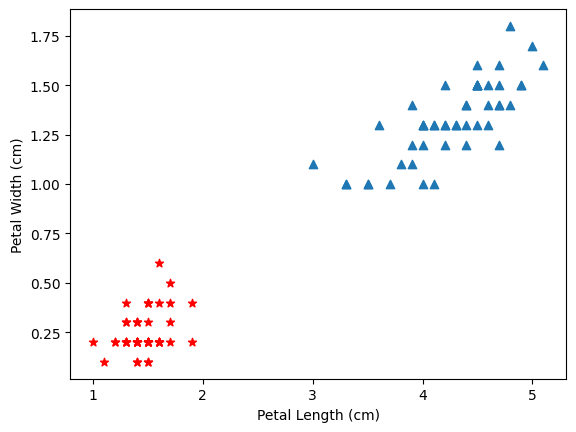

In [39]:
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'red',marker='*')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='^')

Now fit the model

In [41]:
from sklearn.model_selection import train_test_split

In [45]:
X = df.drop(df[['target','target_flower']],axis = 1)
y = df.target

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2)

In [50]:
X_train.shape

(120, 4)

In [51]:
from sklearn.svm import SVC

In [52]:
model = SVC() # you also can do model = SVC(C=10) C = any number regularization.
# model = SVC(gamma = 1) like this. do check on the main documentation
# model = SVC(karnel = 'linear')
# click on SVC() hit shift+Tab to see more options

In [53]:
model.fit(X_train,y_train)

SVC()

In [54]:
model.score(X_test,y_test)

0.9666666666666667

### Exercise

Use sklearn hand written data and do svm use different parameters. see the score and output etc

use 80 % as train and 20 as test

### Exercise done